#언어 모델

언어라는 것을 모델링하여 단어 sequence (문장)에 확률을 할당하는 모델이다.

만드는 방법은 통계를 이용한 방법과 인공 신경망을 이용한 방법으로 구분이 된다. 최근에는 모두 인공 신경망을 통해 언어 모델을 만들고 있다.

1. 언어 모델

문장에 확률을 할당하는 것이다. 즉, 가장 자연스러운 문장 / 단어를 찾아내는 것이다.

2. 확률 할당

어떤 문장/ 확률이 자연스러운지 알아내기 위해 확률을 사용하는 것이다. 어떤 단어들이 주어졌을 때, 그 다음에 나올 가능성이 가장 높은 단어를 계산하는 것이다.

2-1. 기계 번역

P(나는 버스를 탔다) > P(나는 버스를 태운다)

2-2. 오타 교정

선생님이 교실로 부리나케  
P(달려갔다) > P(잘려갔다)  

즉, 확률을 통해 보다 적절한 문장을 판단하는 것이다.



3. 주어진 이전 단어들로부터 다음 단어 예측하기

확률을 계산한다고 할 때, 이 확률은 조건부 확률이다.

n-1개의 단어가 주어졌을 때, n번째 단어의 확률은

P(w_n | w_1, ..., w_{n-1}) 이다.

따라서 하나의 문장이 나올 확률은 모든 단어가 예측되어야 함으로 다음과 같다.

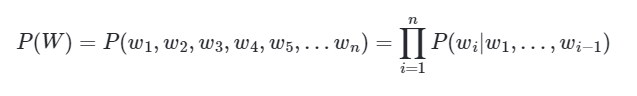

앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 확률을 예측해보고 가장 높은 확률을 가진 단어를 선택합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택하는 것이다.

#통계적 언어 모델

언어 모델의 전통적인 접근 방법이다. 조건부 확률을 통해 언어를 모델링한다.

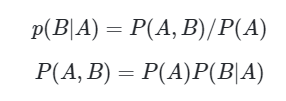

이는 두 확률 P(A), P(B)에 대한 관계이다.

이를 확장하면

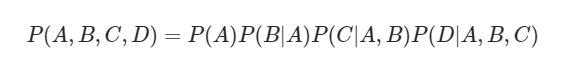

이런 조건부 확률의 확장은 chain rule과 비슷하다.

Chain rule을 일반화해보면

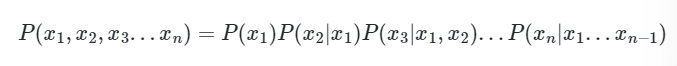


#chain rule이 말이 되는 이유

문장을 이루는 단어들은 모두 문맥에 의해 이전 단어의 영향을 받아 나온 단어들이다. 그렇기 때문에 문장의 확률을 구하고 싶다면, 문장을 이루는 단어들이 주어진 문맥에서 나올 확률을 모두 구하면 문장의 확률을 얻을 수 있다.

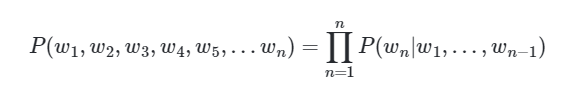

이 공식을 An adorable little boy is spreading smiles 이라는 문장에 대입해보면

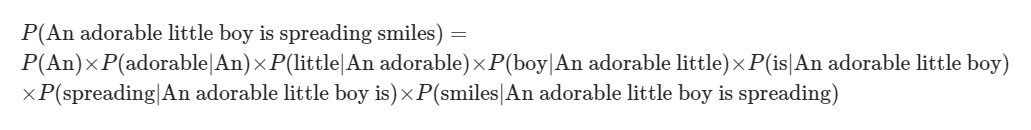




#그렇다면 이 확률들은 어디서 구할까?

확률 기반 모델에서는 주어진 문맥에서 나오는 단어들을 모두 세어서 확률을 구했다. 즉, count 기반으로 확률을 계산하였다.

예를 들어, An adorable little boy가 나왔을 때, is가 나올 확률인 P(is|An adorable little boy)를 구하려면

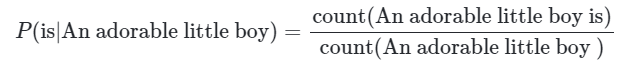

즉, 그냥 다 세는 것이다. Corpus에서 An adorable little boy가 100번 등장했는데 그 뒤에 is가 제일 많이 나왔다면 is가 나올 것이라고 예측하는 것이다.


#count 기반 확률 접근의 한계

하지만 이렇다면 굉장하게 많은 corpus가 필요하다. 만약에 An adorable little boy가 나온 corpus가 없다면 예측을 전혀 하지 못하는 것이다. 따라서, 이때의 확률은 0이 된다. 이런 문제를 Sparsity problem이라고 한다. 이런 문제를 해결하기 위해 다양한 해결책들이 구상되었다.

#해결방법 1: N-gram 언어 모델

조건부 확률을 구할 때 모든 단어들을 고려하였다. 하지만 일부 단어들만 고려한다면 sparsity 문제가 완화된다. N-gram 언어 모델은 일부 N개의 단어들만 고려하여 다음 단어를 예측한다.

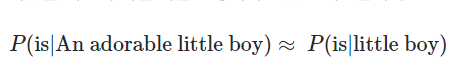

모든 단어들을 고려하면, 그 문맥이 주어진 corpus에 없다면 예측을 아예 하지 못했다. 하지만 이렇게 일부 단어에 대해서만 예측을 한다면? sparsity 문제가 발생할 가능성을 낮출 수 있다.

N-gram은 n개의 연속적인 단어의 나열을 의미한다. 이를 구현하기 위해 corpus에서 단어들을 n개씩 끊어서 하나의 token으로 간주한다.
예를 들어, An adorable little boy is spreading smiles 문장이 있을 때, 3-gram을 기반으로 토큰화하면, an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles 으로 된다.

#n-gram의 문제점

전체적인 문맥을 파악할 수 없기 때문에 성능이 떨어진다.

n이 커질수록, 토큰의 수가 증가하여 모델 사이즈가 급격하게 커진다. 따라서 n은 5보다는 크게 잡을 수가 없다고 한다.

#모델의 성능을 비교하는 방법: Perplexity

Perplexed = 헷갈리는

Perplexity는 헷갈리는 정도를 의미한다. 따라서, 낮을수록 성능이 좋은 것이다.

PPL은 문장의 길이로 정규화된 문장 확률의 역수. 문장 W의 길이가 N이라고 할 때의 PPL 공식은 다음과 같다.

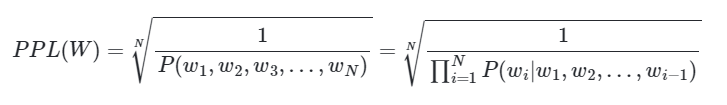


#분기 계수(Branching Factor)

Perplexity는 선택할 수 있는 가능한 경우의 수를 의미한다. 이는 분기 계수와 동일한 의미이다. 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 고민하는지를 계산하여 PPL을 계산하는 것이다.

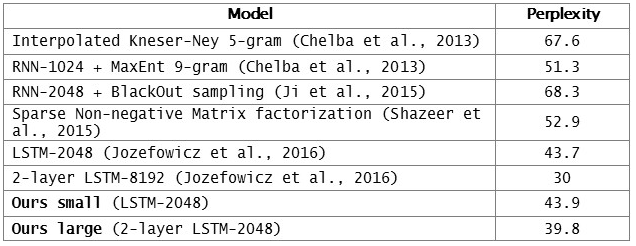